# Categorical Variable Encoding

#### Taken from Baijayanta Roy's article in TowardsDataScience
[Original Article](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)
#### By Carlos Santillán

## Introduction

Categorical variables can be divided in 2:

1. Nominal (no particular order)


2. Ordinal (some order)

Few examples as below for Nominal variable:

- Red, Yellow, Pink, Blue
- Singapore, Japan, USA, India, Korea
- Cow, Dog, Cat, Snake


Example of Ordinal variables:
- High, Medium, Low
- “Strongly agree,” Agree, Neutral, Disagree, and “Strongly Disagree.”
- Excellent, Okay, Bad

I will cover most of them from basic to more advanced ones in this post. I will be comprising these encoding:

1. One Hot Encoding
2. Label Encoding
3. Ordinal Encoding
4. Helmert Encoding
5. Binary Encoding
6. Frequency Encoding
7. Mean Encoding
8. Weight of Evidence Encoding
9. Probability Ratio Encoding
10. Hashing Encoding
11. Backward Difference Encoding
12. Leave One Out Encoding
13. James-Stein Encoding
14. M-estimator Encoding
15. Thermometer Encoder (To be updated)

For explanation, I will use this data-frame, which has two independent variables or features(Temperature and Color) and one label (Target). It also has Rec-No, which is a sequence number of the record. There is a total of 10 records in this data-frame.

In [1]:
import pandas as pd
import numpy as np

data = {'Temperature' : ['Hot', 'Cold', 'Very Hot', 'Warm', 'Hot', 'Warm', 'Warm', 'Hot', 'Hot', 'Cold'],
        'Color': ['Red', 'Yellow', 'Blue', 'Blue', 'Red', 'Yellow', 'Red', 'Yellow', 'Yellow', 'Yellow'], 
        'Target': [1, 1, 1, 0, 1, 0, 1, 0, 1, 1]}

df = pd.DataFrame(data, columns = ['Temperature', 'Color', 'Target'])

In [ ]:
df

,Temperature,Color,Target
0,Hot,Red,1
1,Cold,Yellow,1
2,Very Hot,Blue,1
3,Warm,Blue,0
4,Hot,Red,1
5,Warm,Yellow,0
6,Warm,Red,1
7,Hot,Yellow,0
8,Hot,Yellow,1
9,Cold,Yellow,1


## One Hot Encoding

In this method, we map each category to a vector that contains 1 and 0 denoting the presence or absence of the feature. The number of vectors depends on the number of categories for features. This method produces a lot of columns that slows down the learning significantly if the number of the category is very high for the feature. Pandas has *get_dummies* function, which is quite easy to use. For the sample data-frame code would be as below:


In [ ]:
df1 = pd.get_dummies(df, prefix=['Temp'], columns=['Temperature'])
df1 

,Color,Target,Temp_ Hot,Temp_Cold,Temp_Hot,Temp_Very Hot,Temp_Warm
0,Red,1,0,0,1,0,0
1,Yellow,1,0,1,0,0,0
2,Blue,1,0,0,0,1,0
3,Blue,0,0,0,0,0,1
4,Red,1,1,0,0,0,0
5,Yellow,0,0,0,0,0,1
6,Red,1,0,0,0,0,1
7,Yellow,0,0,0,1,0,0
8,Yellow,1,0,0,1,0,0
9,Yellow,1,0,1,0,0,0


Scikit-learn has OneHotEncoder for this purpose, but it does not create an additional feature column (another code is needed, as shown in the below code sample):

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder()
ohe = ohc.fit_transform(df.Temperature.values.reshape(-1, 1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns = ['Temp_' + str(ohc.categories_[0][i]) 
                                        for i in range(len(ohc.categories__[0]))])

dfh = pd.concat([df, dfOneHot], axis = 1)
dfh

AttributeError: ignored

One Hot Encoding is very popular. We can represent all categories by N-1 (N= No of Category) as that is sufficient to encode the one that is not included. Usually, for Regression, we use N-1 (drop first or last column of One Hot Coded new feature ), but for classification, the recommendation is to use all N columns without as most of the tree-based algorithm builds a tree based on all available variables. One hot encoding with N-1 binary variables should be used in linear Regression, to ensure the correct number of degrees of freedom (N-1).

The linear Regression has access to all of the features as it is being trained, and therefore examines the whole set of dummy variables altogether. This means that N-1 binary variables give complete information about (represent completely) the original categorical variable to the linear Regression. This approach can be adopted for any machine learning algorithm that looks at ALL the features at the same time during training. For example, support vector machines and neural networks as well and clustering algorithms.

In tree-based methods, we will never consider that additional label if we drop. Thus, if we use the categorical variables in a tree-based learning algorithm, it is good practice to encode it into N binary variables and don’t drop.


## Label Encoding

In this encoding, each category is assigned a value from 1 through N (here N is the number of categories for the feature. One major issue with this approach is there is no relation or order between these classes, but the algorithm might consider them as some order, or there is some relationship. In below example it may look like (Cold<Hot<Very Hot<Warm….0 < 1 < 2 < 3 ) .Scikit-learn code for the data-frame as follows:

In [ ]:
from sklearn.preprocessing import LabelEncoder
df2 = df.copy()
df2['Temp_label_encoded'] = LabelEncoder().fit_transform(df2.Temperature)
df2

,Temperature,Color,Target,Temp_label_encoded
0,Hot,Red,1,2
1,Cold,Yellow,1,1
2,Very Hot,Blue,1,3
3,Warm,Blue,0,4
4,Hot,Red,1,0
5,Warm,Yellow,0,4
6,Warm,Red,1,4
7,Hot,Yellow,0,2
8,Hot,Yellow,1,2
9,Cold,Yellow,1,1


Pandas *factorize* also perform the same function:

In [ ]:
df2.loc[:, 'Temp_factorize_encode'] = pd.factorize(df2['Temperature'])[0].reshape(-1, 1)
df2

,Temperature,Color,Target,Temp_label_encoded,Temp_factorize_encode
0,Hot,Red,1,2,0
1,Cold,Yellow,1,1,1
2,Very Hot,Blue,1,3,2
3,Warm,Blue,0,4,3
4,Hot,Red,1,0,4
5,Warm,Yellow,0,4,3
6,Warm,Red,1,4,3
7,Hot,Yellow,0,2,0
8,Hot,Yellow,1,2,0
9,Cold,Yellow,1,1,1


## Ordinal Encoding

We do Ordinal encoding to ensure the encoding of variables retains the ordinal nature of the variable. This is reasonable only for ordinal variables, as I mentioned at the beginning of this article. This encoding looks almost similar to Label Encoding but slightly different as Label coding would not consider whether variable is ordinal or not and it will assign sequence of integers:

- as per the order of data (Pandas assigned Hot (0), Cold (1), “Very Hot” (2) and Warm (3)) or

- as per alphabetical sorted order (scikit-learn assigned Cold(0), Hot(1), “Very Hot” (2) and Warm (3)).

If we consider in the temperature scale as the order, then the ordinal value should from cold to “Very Hot. “ Ordinal encoding will assign values as ( Cold(1) <Warm(2)<Hot(3)<”Very Hot(4)). Usually, we Ordinal Encoding is done starting from 1.

Refer to this code using Pandas, where first, we need to assign the original order of the variable through a dictionary. Then we can map each row for the variable as per the dictionary.

In [ ]:
tempDict = {'Cold' : 1, 
            'Warm': 2, 
            'Hot' : 3, 
            'Very Hot' : 4}

df3 = df.copy()

df3['Temp_Ordinal'] = df3.Temperature.map(tempDict)

df3

,Temperature,Color,Target,Temp_Ordinal
0,Hot,Red,1,3
1,Cold,Yellow,1,1
2,Very Hot,Blue,1,4
3,Warm,Blue,0,2
4,Hot,Red,1,3
5,Warm,Yellow,0,2
6,Warm,Red,1,2
7,Hot,Yellow,0,3
8,Hot,Yellow,1,3
9,Cold,Yellow,1,1


## Helmert Encoding

In this encoding, the mean of the dependent variable for a level is compared to the mean of the dependent variable over all previous levels.

The version in category_encoders is sometimes referred to as Reverse Helmert Coding. The mean of the dependent variable for a level is compared to the mean of the dependent variable over all previous levels. Hence, the name ‘reverse’ is used to differentiate from forward Helmert coding.

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.5MB/s 


In [ ]:
import category_encoders as ce 

encoder = ce.HelmertEncoder(cols = ['Temperature'], drop_invariant = True)
dfh = encoder.fit_transform(df['Temperature'])
df4 = pd.concat([df, dfh], axis=1)
df4

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Temperature,Color,Target,Temperature_0,Temperature_1,Temperature_2
0,Hot,Red,1,-1.0,-1.0,-1.0
1,Cold,Yellow,1,1.0,-1.0,-1.0
2,Very Hot,Blue,1,0.0,2.0,-1.0
3,Warm,Blue,0,0.0,0.0,3.0
4,Hot,Red,1,-1.0,-1.0,-1.0
5,Warm,Yellow,0,0.0,0.0,3.0
6,Warm,Red,1,0.0,0.0,3.0
7,Hot,Yellow,0,-1.0,-1.0,-1.0
8,Hot,Yellow,1,-1.0,-1.0,-1.0
9,Cold,Yellow,1,1.0,-1.0,-1.0


## Binary Encoding

Binary encoding converts a category into binary digits. Each binary digit creates one feature column. If there are n unique categories, then binary encoding results in the only log(base 2)ⁿ features. In this example, we have four features; thus, the total number of the binary encoded features will be three features. Compared to One Hot Encoding, this will require fewer feature columns (for 100 categories One Hot Encoding will have 100 features while for Binary encoding, we will need just seven features).

For Binary encoding, one has to follow the following steps:

- The categories are first converted to numeric order starting from 1 (order is created as categories appear in a dataset and do not mean any ordinal nature)

- Then those integers are converted into binary code, so for example 3 becomes 011, 4 becomes 100

- Then the digits of the binary number form separate columns.


First, turn the categorical value to integers by some orders (e.g. alphabetical order or order of appearance for the top row). Next, turn it to binary digit such that 1 to 1, 2 to 10, 5 to 101, etc. Finally, split the binary digit into separate columns each of which has a single digit.

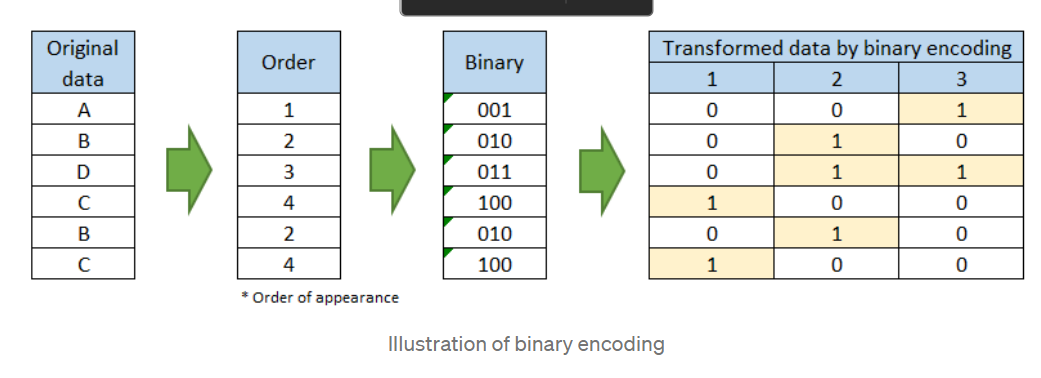

**Binary encoding can reduce the number of new columns to log_2(number of levels) order**. As you can see in the example above, one of the new columns has 1 in different original level, which is **not a good thing** because the levels having 1 in the same column will be treated to share some property by the model while actually they have 1 in the same column just for a technical reason.

Binary encoding is a combination of Hash encoding and one-hot encoding. In this encoding scheme, the categorical feature is first converted into numerical using an ordinal encoder. Then the numbers are transformed in the binary number. After that binary value is split into different columns.

Binary encoding works really well when there are a high number of categories. For example the cities in a country where a company supplies its products.

In [6]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.2MB/s 


In [ ]:
import category_encoders as ce 

encoder = ce.BinaryEncoder(cols = ['Temperature'])
dfbin = encoder.fit_transform(df['Temperature'])

df5 = pd.concat([df, dfbin], axis = 1)
df5

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Temperature,Color,Target,Temperature_0,Temperature_1,Temperature_2
0,Hot,Red,1,0,0,1
1,Cold,Yellow,1,0,1,0
2,Very Hot,Blue,1,0,1,1
3,Warm,Blue,0,1,0,0
4,Hot,Red,1,0,0,1
5,Warm,Yellow,0,1,0,0
6,Warm,Red,1,1,0,0
7,Hot,Yellow,0,0,0,1
8,Hot,Yellow,1,0,0,1
9,Cold,Yellow,1,0,1,0


BaseN encoding is the generalization of binary encoding in a sense that, instead of using base 2, BaseN uses an arbitrary number as the base.


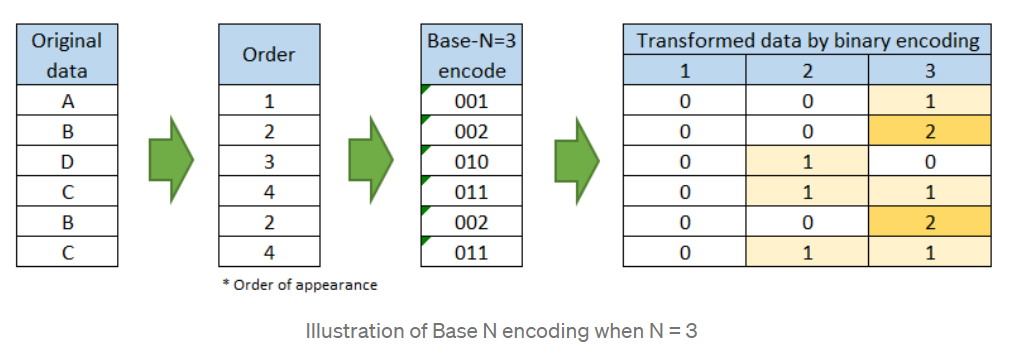

As N goes up the number of new columns gets fewer, but it also means there gets more overlapped information within the new columns than we saw in binary encoding case, which potentially makes the final model worse. If N is infinite, BaseN encoding is exactly the same as label encoding. As I discussed above, label encoding is inappropriate for most of the models.

In [7]:
import category_encoders
from category_encoders import BaseNEncoder
import pandas as pd

df_x = pd.DataFrame({'v1':['A','B','D','C','B','C'], 'v2':[10,11,2,0,30,50]})
bne = BaseNEncoder(base=3)
df_bne = bne.fit_transform(df_x['v1'])
pd.concat([df_x,df_bne],axis=1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,v1,v2,v1_0,v1_1,v1_2
0,A,10,0,0,1
1,B,11,0,0,2
2,D,2,0,1,0
3,C,0,0,1,1
4,B,30,0,0,2
5,C,50,0,1,1


## Frequency Encoding

It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data. Three-step for this :

- Select a categorical variable you would like to transform

- Group by the categorical variable and obtain counts of each category

- Join it back with the training dataset

Pandas code can be constructed as below:

In [ ]:
fe = df.groupby('Temperature').size()/len(df)
df.loc[:, 'Temp_freq_encode'] = df['Temperature'].map(fe)
df

,Temperature,Color,Target,Temp_freq_encode
0,Hot,Red,1,0.4
1,Cold,Yellow,1,0.2
2,Very Hot,Blue,1,0.1
3,Warm,Blue,0,0.3
4,Hot,Red,1,0.4
5,Warm,Yellow,0,0.3
6,Warm,Red,1,0.3
7,Hot,Yellow,0,0.4
8,Hot,Yellow,1,0.4
9,Cold,Yellow,1,0.2


## Mean Encoding

Mean Encoding or Target Encoding is one viral encoding approach followed by Kagglers. There are many variations of this. Here I will cover the basic version and smoothing version. Mean encoding is similar to label encoding, except here labels are correlated directly with the target. For example, in mean target encoding for each category in the feature label is decided with the mean value of the target variable on a training data. This encoding method brings out the relation between similar categories, but the connections are bounded within the categories and target itself.

The advantages of the mean target encoding are that it does not affect the volume of the data and helps in faster learning. Usually, Mean encoding is notorious for over-fitting; thus, a regularization with cross-validation or some other approach is a must on most occasions. Mean encoding approach is as below:

1. Select a categorical variable you would like to transform

2. Group by the categorical variable and obtain aggregated sum over the “Target” variable. (total number of 1’s for each category in ‘Temperature’)

3. Group by the categorical variable and obtain aggregated count over “Target” variable

4. Divide the step 2 / step 3 results and join it back with the train.

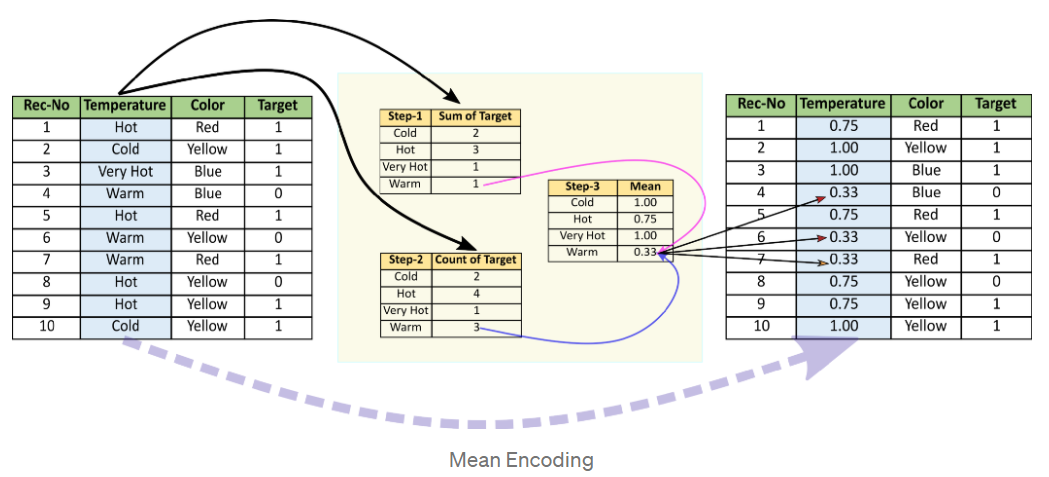

Sample code:


In [ ]:
mean_encode = df.groupby('Temperature')['Target'].mean()
print(mean_code)
df.loc[:, 'Temperature_mean_enc'] = df['Temperature'].map(mean_encode)
df

Temperature
Cold        1.000000
Hot         0.750000
Very Hot    1.000000
Warm        0.333333
Name: Target, dtype: float64


,Temperature,Color,Target,Temp_freq_encode,Temperature_mean_enc
0,Hot,Red,1,0.4,0.750000
1,Cold,Yellow,1,0.2,1.000000
2,Very Hot,Blue,1,0.1,1.000000
3,Warm,Blue,0,0.3,0.333333
4,Hot,Red,1,0.4,0.750000
5,Warm,Yellow,0,0.3,0.333333
6,Warm,Red,1,0.3,0.333333
7,Hot,Yellow,0,0.4,0.750000
8,Hot,Yellow,1,0.4,0.750000
9,Cold,Yellow,1,0.2,1.000000


Mean encoding can embody the target in the label, whereas label encoding does not correlate with the target. In the case of a large number of features, mean encoding could prove to be a much simpler alternative. Mean encoding tends to group the classes, whereas the grouping is random in case of label encoding.

There are many variations of this target encoding in practice, like smoothing. Smoothing can implement as below:


In [ ]:
### Compute the global mean
mean = df['Target'].mean()

### Compute the number of values and the mean of each group
agg = df.groupby('Temperature')['Target'].agg(['count', 'mean'])
counts = agg['count']
means = agg['mean']
weight = 100

### Compute smoothed means
smooth = (counts * means + weight * mean) / (counts + weight)

### Replace each value by according smoothed mean
print(smooth)

df.loc[:, 'Temperature_smean_enc'] = df['Temperature'].map(smooth)
df


Temperature
Cold        0.705882
Hot         0.701923
Very Hot    0.702970
Warm        0.689320
dtype: float64


,Temperature,Color,Target,Temp_freq_encode,Temperature_mean_enc,Temperature_smean_enc
0,Hot,Red,1,0.4,0.750000,0.701923
1,Cold,Yellow,1,0.2,1.000000,0.705882
2,Very Hot,Blue,1,0.1,1.000000,0.702970
3,Warm,Blue,0,0.3,0.333333,0.689320
4,Hot,Red,1,0.4,0.750000,0.701923
5,Warm,Yellow,0,0.3,0.333333,0.689320
6,Warm,Red,1,0.3,0.333333,0.689320
7,Hot,Yellow,0,0.4,0.750000,0.701923
8,Hot,Yellow,1,0.4,0.750000,0.701923
9,Cold,Yellow,1,0.2,1.000000,0.705882


## Weight of Evidence Encoding

Weight of Evidence (WoE) is a measure of the “strength” of a grouping technique to separate good and bad. This method was developed primarily to build a predictive model to evaluate the risk of loan default in the credit and financial industry. Weight of evidence (WOE) is a measure of how much the **evidence supports or undermines a hypothesis**.

It is computed as below:

$$WoE = ln(\frac{Distr \; Goods}{Dist \; Bads}) * 100$$

- $\frac{P(Goods)}{P(Bads)} = 1 \Rightarrow WoE = 0$
  - That is if the outcome is random for that group.

- if $P(Bads) > P(Goods) \Rightarrow odds \; ratio < 1 \Rightarrow WoE < 0$

- if $P(Goods) > P(Bads) \Rightarrow WoE > 0$

WoE is well suited for Logistic Regression because the Logit transformation is simply the log of the odds, i.e., $ln(\frac{P(Goods)}{P(Bads)})$. Therefore, by using WoE-coded predictors in Logistic Regression, the predictors are all prepared and coded to the same scale. The parameters in the linear logistic regression equation can be directly compared.

The WoE transformation has (at least) **three advantage**:

1. It can transform an independent variable so that it establishes a monotonic relationship to the dependent variable. It does more than this — to secure monotonic relationship it would be enough to “recode” it to any ordered measure (for example 1,2,3,4…), but the WoE transformation orders the categories on a “logistic” scale which is natural for Logistic Regression

2. For variables with too many (sparsely populated) discrete values, these can be grouped into categories (densely populated), and the WoE can be used to express information for the whole category

3. The (univariate) effect of each category on the dependent variable can be compared across categories and variables because WoE is a standardized value (for example you can compare WoE of married people to WoE of manual workers)

It also has (at least) **three drawbacks**:
1. Loss of information (variation) due to binning to a few categories

2. It is a **“univariate” measure**, so it does not take into account the correlation between independent variables

3. It is easy to manipulate (over-fit) the effect of variables according to how categories are created

In [ ]:
### Calculate probability target = 1 i.e. Good = 1 for each category
woe_df = df.groupby('Temperature')['Target'].mean()
woe_df = pd.DataFrame(woe_df)

### Rename the column name to 'Good' to keep it consistent with formula for easy understanding 
woe_df = woe_df.rename(columns = {'Target':'Good'})

### Calculate Bad probability which is 1 - Good Probability
woe_df['Bad'] = 1 - woe_df.Good

### We need to add a small value to avoid divide by zero in denominator
woe_df['Bad'] = np.where(woe_df['Bad'] == 0, 0.000001, woe_df['Bad'])

### Compute de WoE
woe_df['WoE'] = np.log(woe_df.Good / woe_df.Bad)
woe_df 


,Good,Bad,WoE
Temperature,,,
Cold,1.000000,0.000001,13.815511
Hot,0.750000,0.250000,1.098612
Very Hot,1.000000,0.000001,13.815511
Warm,0.333333,0.666667,-0.693147


Once we calculate WoE for each group, we can map back this to Data-frame:

In [ ]:
df.loc[:, 'WOE_Encode'] = df['Temperature'].map(woe_df['WoE'])
df

,Temperature,Color,Target,Temp_freq_encode,Temperature_mean_enc,Temperature_smean_enc,WOE_Encode
0,Hot,Red,1,0.4,0.750000,0.701923,1.098612
1,Cold,Yellow,1,0.2,1.000000,0.705882,13.815511
2,Very Hot,Blue,1,0.1,1.000000,0.702970,13.815511
3,Warm,Blue,0,0.3,0.333333,0.689320,-0.693147
4,Hot,Red,1,0.4,0.750000,0.701923,1.098612
5,Warm,Yellow,0,0.3,0.333333,0.689320,-0.693147
6,Warm,Red,1,0.3,0.333333,0.689320,-0.693147
7,Hot,Yellow,0,0.4,0.750000,0.701923,1.098612
8,Hot,Yellow,1,0.4,0.750000,0.701923,1.098612
9,Cold,Yellow,1,0.2,1.000000,0.705882,13.815511


## Probability Ratio Encoding

Probability Ratio Encoding is similar to Weight Of Evidence(WoE), with the only difference is the only ratio of good and bad probability is used. For each label, we calculate the mean of target=1, that is the probability of being 1 ( P(1) ), and also the probability of the target=0 ( P(0) ). And then, we calculate the ratio P(1)/P(0) and replace the labels by that ratio. We need to add a minimal value with P(0) to avoid any divide by zero scenarios where for any particular category, there is no target=0.

In [2]:
### We calculate probability of target = 1 i.e. Good = 1 for each category
pr_df = df.groupby('Temperature')['Target'].mean()
pr_df = pd.DataFrame(pr_df)

### Rename the column name to 'Good' to keep it consistent with formula for easy understanding
pr_df = pr_df.rename(columns = {'Target':'Good'})

### Calculate bad probability which is 1 - Good Probability
pr_df['Bad'] = 1 - pr_df.Good

### We need to add a small value to avoid divide by zero in denominator
pr_df['Bad'] = np.where(pr_df['Bad'] == 0, 0.000001, pr_df['Bad'])

### COmpute the probability ratio
pr_df['PR'] = pr_df.Good / pr_df.Bad

pr_df

,Good,Bad,PR
Temperature,,,
Cold,1.000000,0.000001,1000000.0
Hot,0.750000,0.250000,3.0
Very Hot,1.000000,0.000001,1000000.0
Warm,0.333333,0.666667,0.5


Now we map the Probability Ratio values back to each row of the DataFrame:

In [3]:
df.loc[:, 'PR_Encode'] = df['Temperature'].map(pr_df['PR'])
df

,Temperature,Color,Target,PR_Encode
0,Hot,Red,1,3.0
1,Cold,Yellow,1,1000000.0
2,Very Hot,Blue,1,1000000.0
3,Warm,Blue,0,0.5
4,Hot,Red,1,3.0
5,Warm,Yellow,0,0.5
6,Warm,Red,1,0.5
7,Hot,Yellow,0,3.0
8,Hot,Yellow,1,3.0
9,Cold,Yellow,1,1000000.0


## Hashing

Hashing converts categorical variables to a higher dimensional space of integers, where the distance between two vectors of categorical variables in approximately maintained the transformed numerical dimensional space. With Hashing, the number of dimensions will be far less than the number of dimensions with encoding like One Hot Encoding. This method is advantageous when the cardinality of categorical is very high.

**(Code pending)**

## Target Encoding

[Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)


Target encoding is a Baysian encoding technique, Bayesian encoders use information from dependent target variables to encode the categorical data.

In target encoding, we calculate the mean of the target variable for each category and replace the category variable with the mean value. In the case of the categorical target variables, the posterior probability of the target replaces each category

In [8]:
#import the libraries
import pandas as pd
import category_encoders as ce

#Create the Dataframe
data=pd.DataFrame({'class':['A,','B','C','B','C','A','A','A'],'Marks':[50,30,70,80,45,97,80,68]})

#Create target encoding object
encoder=ce.TargetEncoder(cols='class') 

#Original Data
data

,class,Marks
0,"A,",50
1,B,30
2,C,70
3,B,80
4,C,45
5,A,97
6,A,80
7,A,68


In [9]:
### Fit and Transform Train Data
encoder.fit_transform(data['class'],data['Marks'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,class
0,65.000000
1,57.689414
2,59.517061
3,57.689414
4,59.517061
5,79.679951
6,79.679951
7,79.679951


We perform Target encoding for train data only and code the test data using results obtained from the training dataset. Although, a very efficient coding system, it has the following issues responsible for deteriorating the model performance:

1. It can lead to target leakage or overfitting. To address overfitting we can use different techniques.

  - In the leave one out encoding, the current target value is reduced from the overall mean of the target to avoid leakage.

  - In another method, we may introduce some Gaussian noise in the target statistics. The value of this noise is hyperparameter to the model.

2. The second issue, we may face is the improper distribution of categories in train and test data. In such a case, the categories may assume extreme values. Therefore the target means for the category are mixed with the marginal mean of the target.

## Backward Difference Encoding

In backward difference coding, the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level. This type of coding may be useful for a nominal or an ordinal variable.

This technique falls under the contrast coding system for categorical features. A feature of K categories, or levels, usually enters a regression as a sequence of K-1 dummy variables.

## Leave One Out Encoding

This is very similar to target encoding but excludes the current row’s target when calculating the mean target for a level to reduce the effect of outliers.

**(Code Pending)**

## James-Stein Encoding

For feature value, James-Stein estimator returns a weighted average of:

1. The mean target value for the observed feature value.


2. The mean target value (regardless of the feature value).

The James-Stein encoder shrinks the average toward the overall average. It is a target based encoder. James-Stein estimator has, however, one practical limitation — it was defined only for normal distributions.

**(Code Pending)**

## M-estimator Encoding

M-Estimate Encoder is a simplified version of Target Encoder. It has only one hyper-parameter — m, which represents the power of regularization. The higher the value of m results, into stronger shrinking. Recommended values for m is in the range of 1 to 100.

**(Code Pending)**

## Conclusion
It is essential to understand, for all machine learning models, all these encodings do not work well in all situations or for every dataset. Data Scientists still need to experiment and find out which works best for their specific case. If test data has different classes, then some of these methods won’t work as features won’t be similar.

There are few benchmark publications by research communities, but it’s not conclusive, which works best. My recommendation will be to try each of these with the smaller datasets and then decide where to put more focus on tuning the encoding process. You can use the below cheat-sheet as a guiding tool.

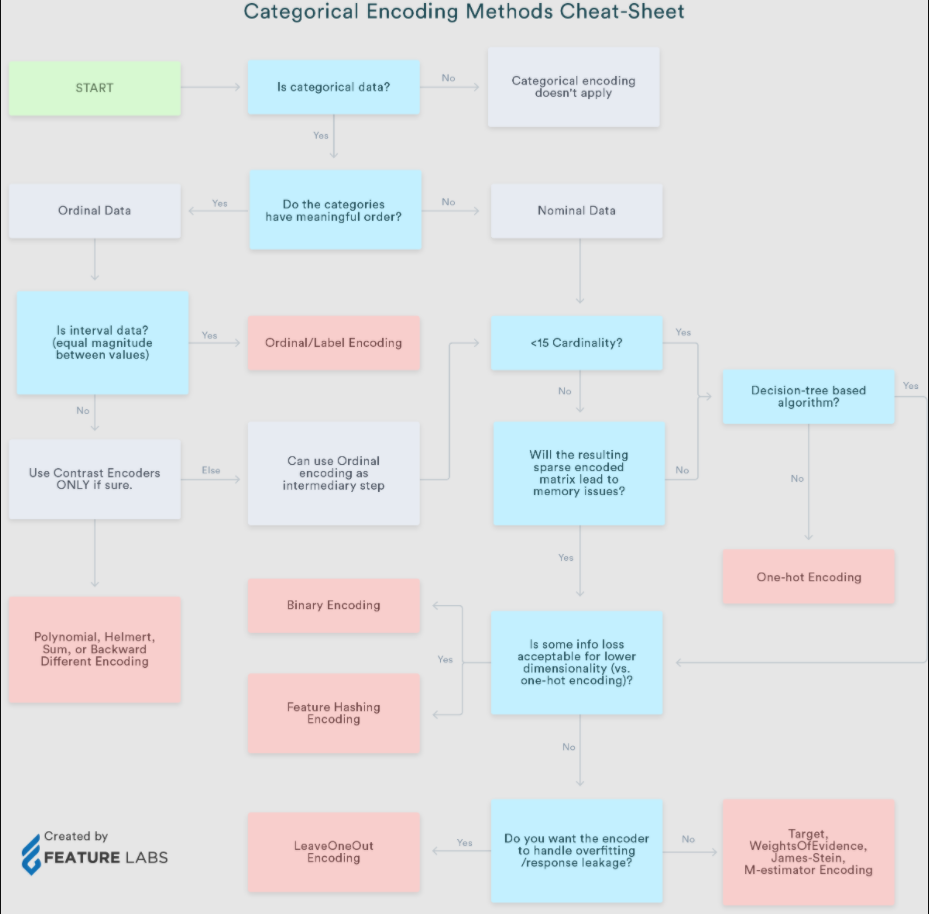